Descriptive Analytics and Data Preprocessing on Sales & Discounts **Dataset**

##	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

In [1]:
import pandas as pd

In [2]:
a = [20,21,22,23,24,25,26,27,28,29,30.5,31,32,33,40,50]

In [3]:
sum(a)/len(a)

28.84375

In [4]:
type(a)

list

In [5]:
ser = pd.Series(a)

In [6]:
type(ser)

pandas.core.series.Series

In [7]:
print(ser)

0     20.0
1     21.0
2     22.0
3     23.0
4     24.0
5     25.0
6     26.0
7     27.0
8     28.0
9     29.0
10    30.5
11    31.0
12    32.0
13    33.0
14    40.0
15    50.0
dtype: float64


In [8]:
print(a)

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30.5, 31, 32, 33, 40, 50]


In [9]:
ser.head(), ser.tail()

(0    20.0
 1    21.0
 2    22.0
 3    23.0
 4    24.0
 dtype: float64,
 11    31.0
 12    32.0
 13    33.0
 14    40.0
 15    50.0
 dtype: float64)

In [10]:
ser[5:10]

5    25.0
6    26.0
7    27.0
8    28.0
9    29.0
dtype: float64

In [11]:
ser[5]

25.0

In [12]:
ser[5] = 10j+2

<ipython-input-12-61ba8bf0656b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '(2+10j)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ser[5] = 10j+2


In [13]:
print(ser)

0     20.0+ 0.0j
1     21.0+ 0.0j
2     22.0+ 0.0j
3     23.0+ 0.0j
4     24.0+ 0.0j
5      2.0+10.0j
6     26.0+ 0.0j
7     27.0+ 0.0j
8     28.0+ 0.0j
9     29.0+ 0.0j
10    30.5+ 0.0j
11    31.0+ 0.0j
12    32.0+ 0.0j
13    33.0+ 0.0j
14    40.0+ 0.0j
15    50.0+ 0.0j
dtype: complex128



## Descriptive Analytics for Numerical Columns



Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).

In [16]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving sales_data_with_discounts.csv to sales_data_with_discounts.csv


In [17]:
sd=pd.read_csv("sales_data_with_discounts.csv")
sd

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


Identify numerical columns in the dataset.

In [18]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [19]:
Numerical_Columns = sd.select_dtypes(include=['number']).columns
print(Numerical_Columns)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


Calculate the mean, median, mode, and standard deviation for these columns.

In [20]:
sd.describe().mean()

Volume                  63.037284
Avg Price            12673.542272
Total Sales Value    42899.738716
Discount Rate (%)       67.879202
Discount Amount       5109.936373
Net Sales Value      38979.669520
dtype: float64

In [21]:
sd.describe().median()

Volume                   4.649135
Avg Price             5775.000000
Total Sales Value    19756.417778
Discount Rate (%)       15.866504
Discount Amount       2167.716579
Net Sales Value      17572.062095
dtype: float64

In [22]:
sd.describe().mode()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,1.000000,290.000000,400.000000,4.220602,69.177942,326.974801
1,3.000000,450.000000,450.000000,5.007822,450.000000,450.000000
2,4.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
3,4.231602,1450.000000,5700.000000,15.155242,988.933733,4677.788059
4,5.066667,10100.000000,33812.835556,16.577766,3346.499424,30466.336131
5,6.000000,10453.433333,50535.074173,18.114718,4509.902963,46358.656624
6,31.000000,18079.904840,53200.000000,19.992407,5316.495427,47847.912852
7,450.000000,60100.000000,196400.000000,450.000000,25738.022194,179507.479049


In [23]:
sd.describe().var()

Volume               2.453957e+04
Avg Price            4.096905e+08
Total Sales Value    4.345335e+09
Discount Rate (%)    2.387280e+04
Discount Amount      7.353641e+07
Net Sales Value      3.637343e+09
dtype: float64

In [24]:
sd.describe().std()

Volume                 156.651107
Avg Price            20240.811541
Total Sales Value    65919.153313
Discount Rate (%)      154.508238
Discount Amount       8575.337507
Net Sales Value      60310.392648
dtype: float64

Provide a brief interpretation of these statistics.

In [25]:
sd.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [26]:
print("Count: \n",sd.count())
print("\n")
print("Min: \n",sd.describe().min())
print("\n")
print("Max: \n",sd.describe().max())
print("\n")
print("Mean: \n",sd.describe().mean())
print("\n")
print("Median: \n",sd.describe().median())
print("\n")
print("Mode: \n",sd.describe().mode())
print("\n")
print("Variance: \n",sd.describe().var())
print("\n")
print("Standard Deviation: \n",sd.describe().std())

Count: 
 Date                 450
Day                  450
SKU                  450
City                 450
Volume               450
BU                   450
Brand                450
Model                450
Avg Price            450
Total Sales Value    450
Discount Rate (%)    450
Discount Amount      450
Net Sales Value      450
dtype: int64


Min: 
 Volume                 1.000000
Avg Price            290.000000
Total Sales Value    400.000000
Discount Rate (%)      4.220602
Discount Amount       69.177942
Net Sales Value      326.974801
dtype: float64


Max: 
 Volume                  450.000000
Avg Price             60100.000000
Total Sales Value    196400.000000
Discount Rate (%)       450.000000
Discount Amount       25738.022194
Net Sales Value      179507.479049
dtype: float64


Mean: 
 Volume                  63.037284
Avg Price            12673.542272
Total Sales Value    42899.738716
Discount Rate (%)       67.879202
Discount Amount       5109.936373
Net Sales Value      38

## Data Visualization

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

●	Histograms:

Plot histograms for each numerical column.

Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.


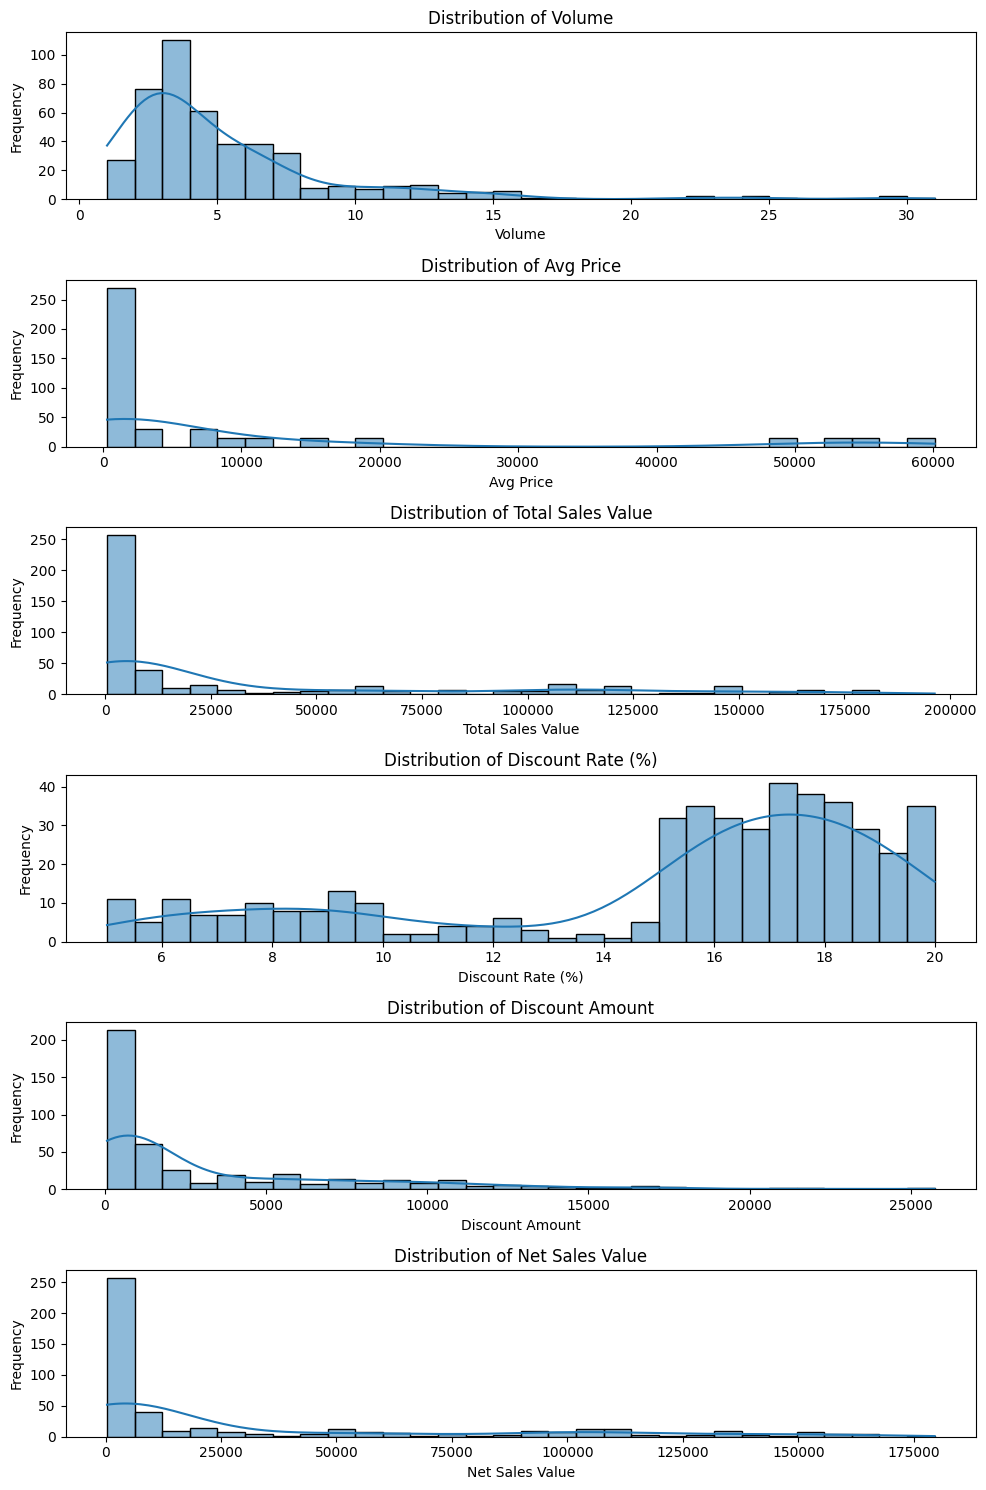

In [28]:
plt.figure(figsize=(10, 15))
for i, col in enumerate(Numerical_Columns):
    plt.subplot(len(Numerical_Columns), 1, i + 1)
    sns.histplot(sd[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

'Volume', 'Avg Price', 'Total Sales Value','Discount Amount', 'Net Sales Value' are right skewed (positive skewness)

but 'Discount Rate (%) is left skewed (negative skewness)

In [29]:
def analyze_distribution(sd, columns):
    for col in columns:
        print(f"Analysis for {col}:")
        skewness = sd[col].skew()
        print(f"  Skewness: {skewness:.2f}")
        outliers = sd[(sd[col] < sd[col].quantile(0.25) - 1.5 * (sd[col].quantile(0.75) - sd[col].quantile(0.25))) |
                      (sd[col] > sd[col].quantile(0.75) + 1.5 * (sd[col].quantile(0.75) - sd[col].quantile(0.25)))]
        print(f"  Presence of outliers: {len(outliers)}\n")

analyze_distribution(sd,Numerical_Columns)

Analysis for Volume:
  Skewness: 2.73
  Presence of outliers: 44

Analysis for Avg Price:
  Skewness: 1.91
  Presence of outliers: 60

Analysis for Total Sales Value:
  Skewness: 1.53
  Presence of outliers: 36

Analysis for Discount Rate (%):
  Skewness: -1.06
  Presence of outliers: 45

Analysis for Discount Amount:
  Skewness: 1.91
  Presence of outliers: 24

Analysis for Net Sales Value:
  Skewness: 1.54
  Presence of outliers: 35



●	Boxplots:

Create boxplots for numerical variables to identify outliers and the interquartile range.

Discuss any findings, such as extreme values or unusual distributions.


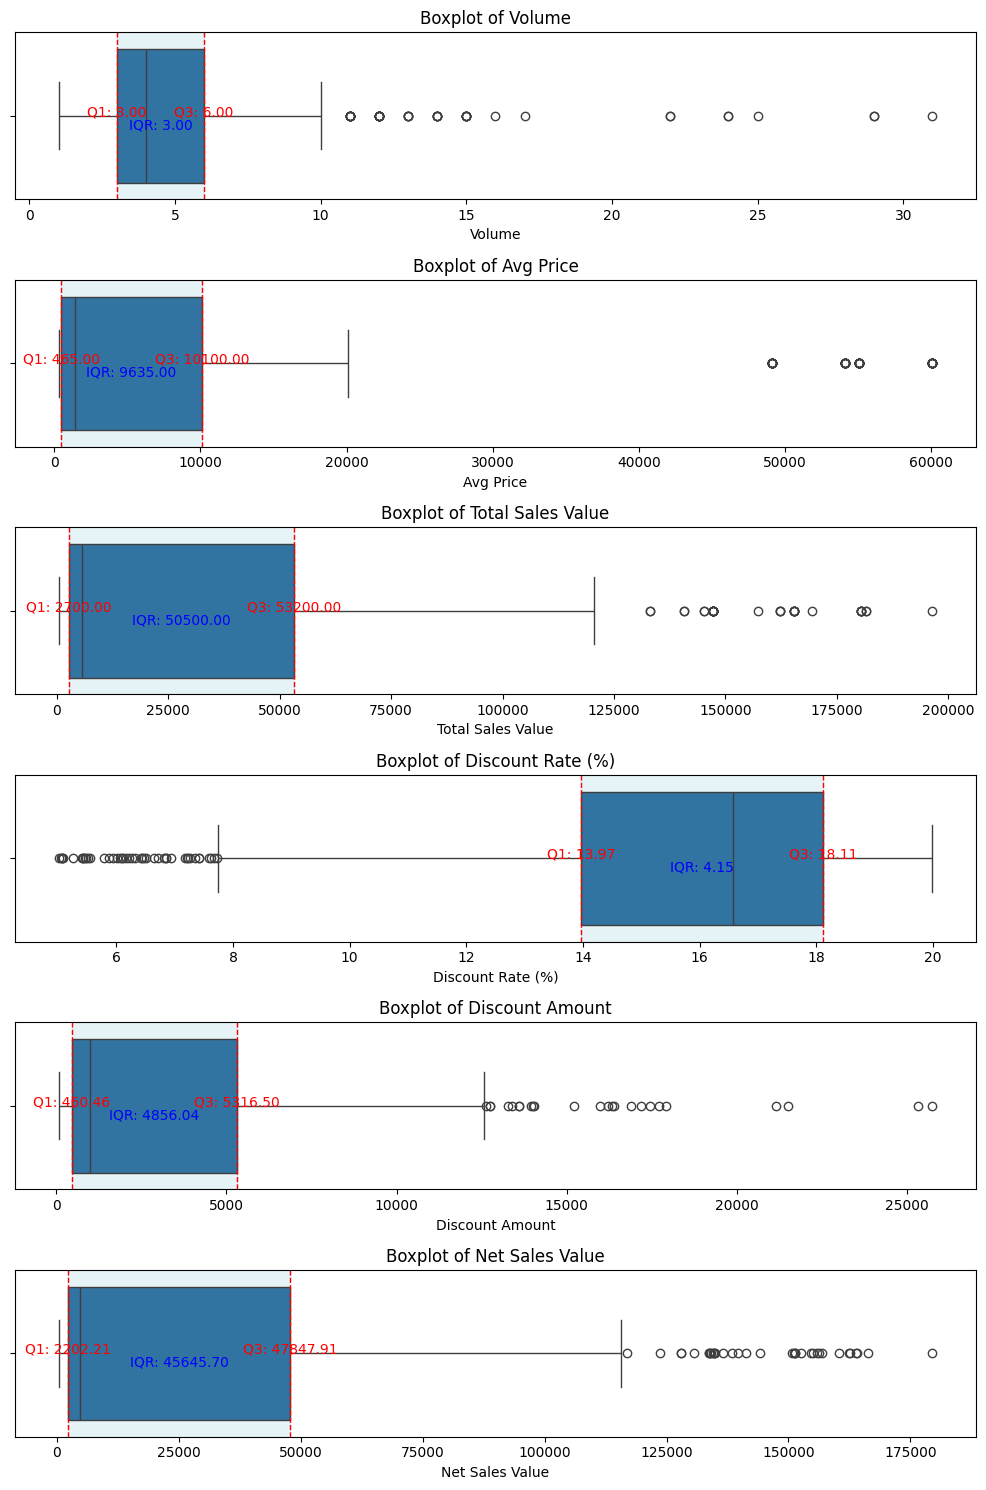

In [30]:
plt.figure(figsize=(10, 15))
for i, col in enumerate(Numerical_Columns):
    plt.subplot(len(Numerical_Columns), 1, i + 1)
    sns.boxplot(x=sd[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.subplots_adjust(hspace=1)
    q1 = sd[col].quantile(0.25)
    q3=sd[col].quantile(0.75)
    iqr = q3 - q1

    # Highlight IQR
    plt.axvline(q1, color='r', linestyle='--', linewidth=1)
    plt.axvline(q3, color='r', linestyle='--', linewidth=1)
    plt.axvspan(q1, q3, alpha=0.3, color='lightblue')

    # Annotate IQR
    plt.text(q1, 0.02, f'Q1: {q1:.2f}', ha='center', va='bottom', color='r')
    plt.text(q3, 0.02, f'Q3: {q3:.2f}', ha='center', va='bottom', color='r')
    plt.text((q1+q3)/2, 0.1, f'IQR: {iqr:.2f}', ha='center', va='bottom', color='b')
plt.tight_layout()
plt.show()


'Volume', 'Avg Price', 'Total Sales Value','Discount Amount', 'Net Sales Value' are right skewed (positive skewness)


but 'Discount Rate (%) is left skewed (negative skewness)

in salce value the outliers are reaching 200000

and in the box plot we also mentioned the interquartail ranfe IQR for eact numarical coloumn

●	Bar Chart Analysis for Categorical Column:

Identify categorical columns in the dataset.

Create bar charts to visualize the frequency or count of each category.

Analyze the distribution of categories and provide insights.


In [32]:
import seaborn as sns
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [33]:
#	Identify categorical columns in the dataset
categorical_columns = sd.select_dtypes(include=['object', 'category']).columns
print(f'Categorical columns: {categorical_columns}')

Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


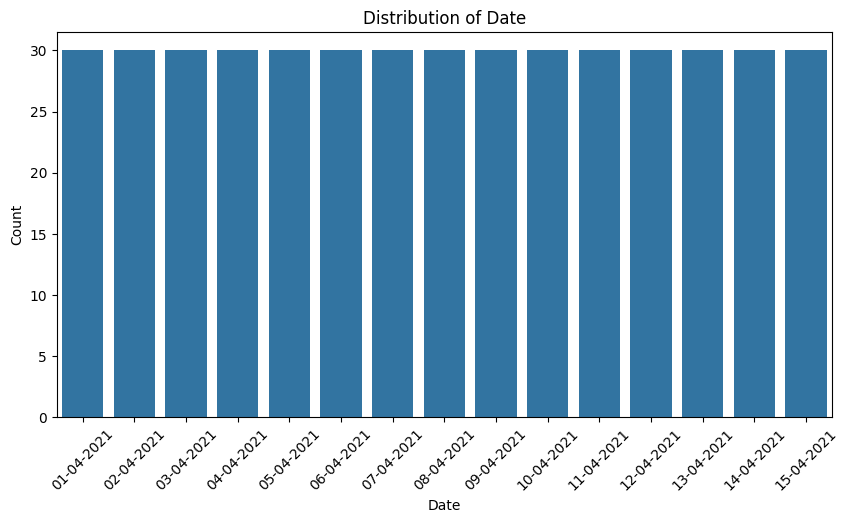

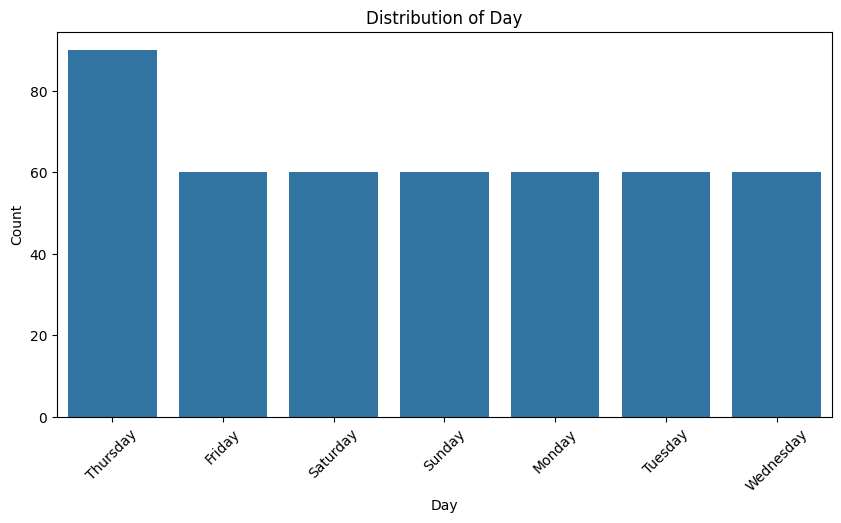

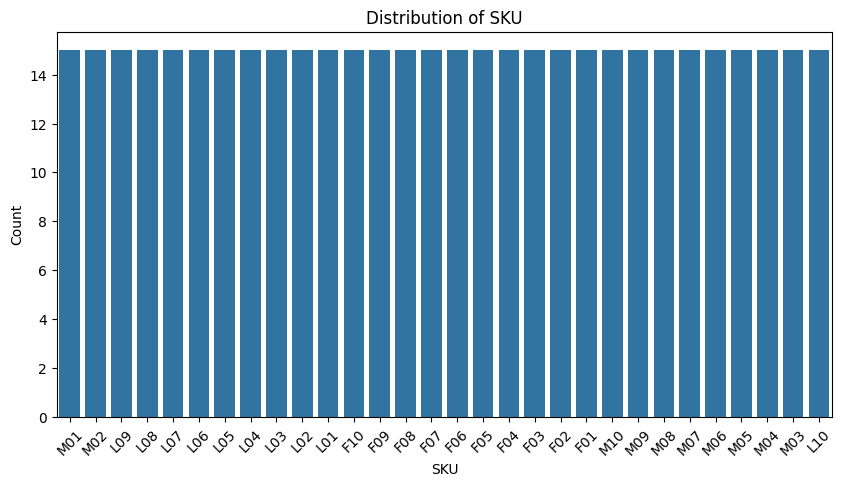

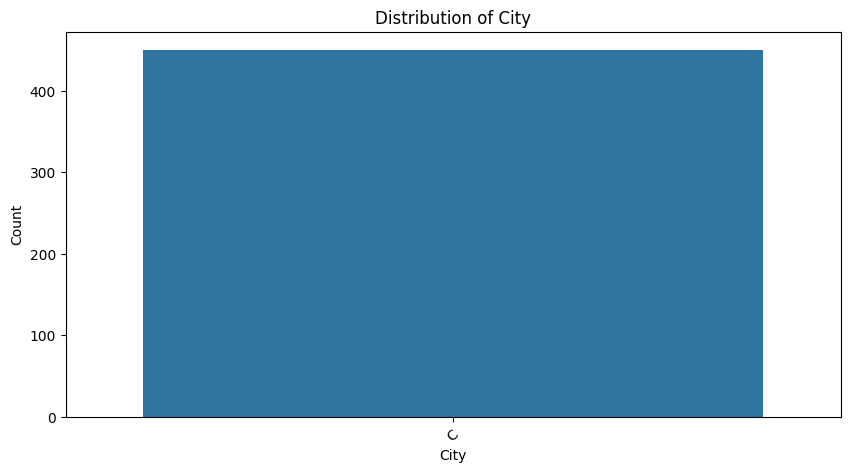

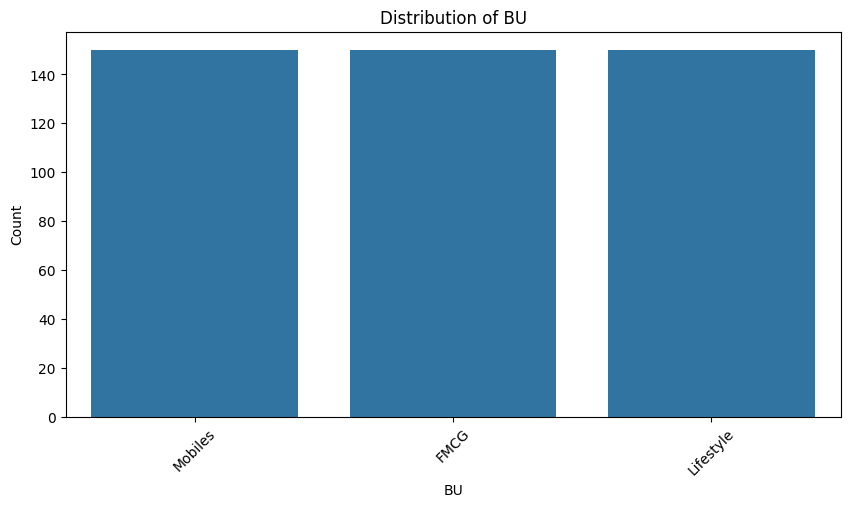

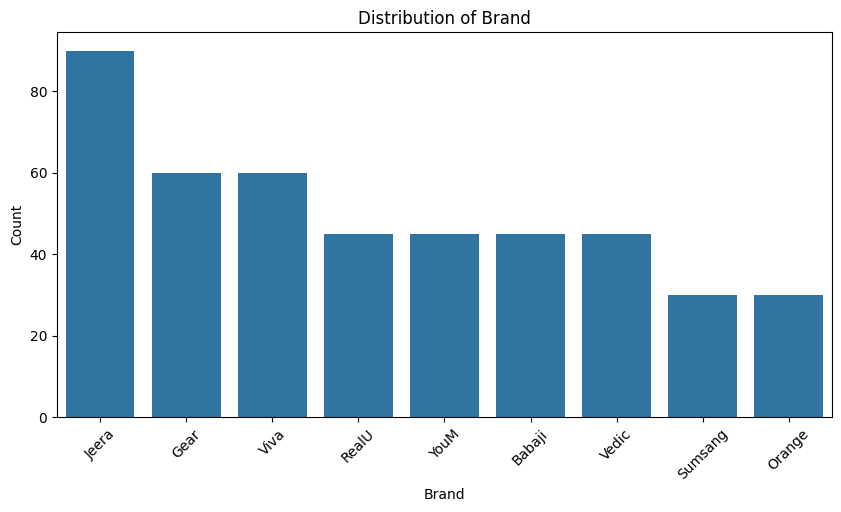

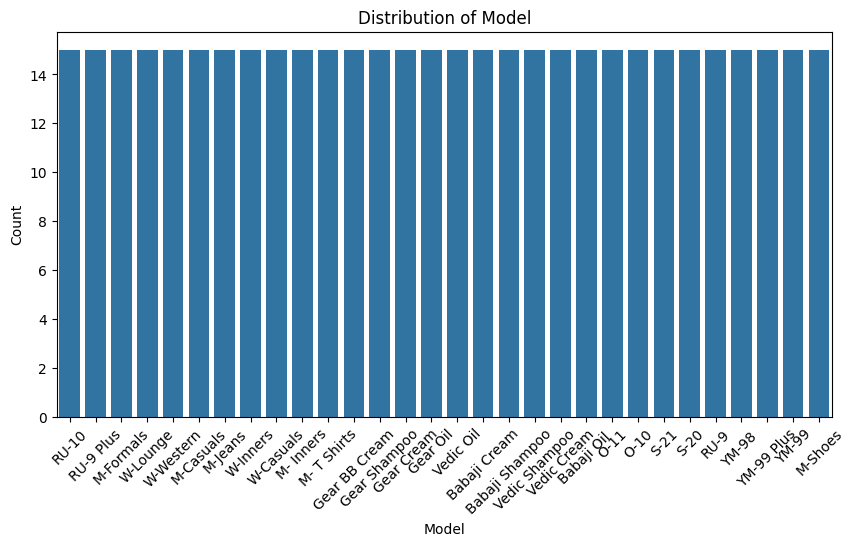

In [36]:
#	Create bar charts to visualize the frequency or count of each category.
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=sd, x=column, order=sd[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [37]:
#	Analyze the distribution of categories and provide insights

print(f'Analysis for {column}:')
print(sd[column].value_counts(normalize=True) * 100)
print('\n')
for column in categorical_columns:
    value_counts = sd[column].value_counts()
    total = len(sd)

    print(f"Insights for {column}:")
    for category, count in value_counts.items():
        percentage = (count / total) * 100
        print(f'Category "{category}" has {count} entries ({percentage:.2f}%)')


for column in categorical_columns:
    value_counts = sd[column].value_counts()
    most_common_category = value_counts.idxmax()
    least_common_category = value_counts.idxmin()
    print(f"The most common category in {column} is '{most_common_category}', "
          f"while the least common category is '{least_common_category}'.")

Analysis for Model:
Model
RU-10             3.333333
RU-9 Plus         3.333333
M-Formals         3.333333
W-Lounge          3.333333
W-Western         3.333333
M-Casuals         3.333333
M-Jeans           3.333333
W-Inners          3.333333
W-Casuals         3.333333
M- Inners         3.333333
M- T Shirts       3.333333
Gear BB Cream     3.333333
Gear Shampoo      3.333333
Gear Cream        3.333333
Gear Oil          3.333333
Vedic Oil         3.333333
Babaji Cream      3.333333
Babaji Shampoo    3.333333
Vedic Shampoo     3.333333
Vedic Cream       3.333333
Babaji Oil        3.333333
O-11              3.333333
O-10              3.333333
S-21              3.333333
S-20              3.333333
RU-9              3.333333
YM-98             3.333333
YM-99 Plus        3.333333
YM-99             3.333333
M-Shoes           3.333333
Name: proportion, dtype: float64


Insights for Date:
Category "01-04-2021" has 30 entries (6.67%)
Category "02-04-2021" has 30 entries (6.67%)
Category "03-04-2021

## Standardization of Numerical Variables

●	Objective:
To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

●	Steps:

Explain the concept of standardization (z-score normalization).

Standardize the numerical columns using the formula: z=x-mu/sigma

Show before and after comparisons of the data distributions.


*   Explain the concept of standardization (z-score normalization).

z= x-mu/sigma
​
Where:

x is the original value,

mu is the mean of the column,

sigma is the standard deviation of the column.

Calculate the mean and standard deviation for each numerical column.

Apply the Z-score formula to each value in the numerical columns.

Compare the data distributions before and after standardization.

In [49]:
selection=sd.select_dtypes(include=['int64','float64'])
q1=np.percentile(selection, 25)
q3=np.percentile(selection, 75)
qd=q3-q1
iqr=qd/2
print("qd:",qd)
print("iqr:",iqr)

qd: 5621.284410661214
iqr: 2810.642205330607


In [50]:
selection.mean(),selection.median(),selection.mode(),selection.var(),selection.std()

(Volume                   5.066667
 Avg Price            10453.433333
 Total Sales Value    33812.835556
 Discount Rate (%)       15.155242
 Discount Amount       3346.499424
 Net Sales Value      30466.336131
 dtype: float64,
 Volume                  4.000000
 Avg Price            1450.000000
 Total Sales Value    5700.000000
 Discount Rate (%)      16.577766
 Discount Amount       988.933733
 Net Sales Value      4677.788059
 dtype: float64,
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
 0       3.0      400.0            24300.0           5.007822        69.177942   
 1       NaN      450.0                NaN           5.055218        73.025199   
 2       NaN      500.0                NaN           5.059801        93.649161   
 3       NaN     1300.0                NaN           5.072124        94.682735   
 4       NaN     8100.0                NaN           5.084108       102.705757   
 ..      ...        ...                ...                ..

In [52]:
!pip install scipy
import scipy.stats as stats
stats.zscore(selection)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


Text(0, 0.5, 'Frequency')

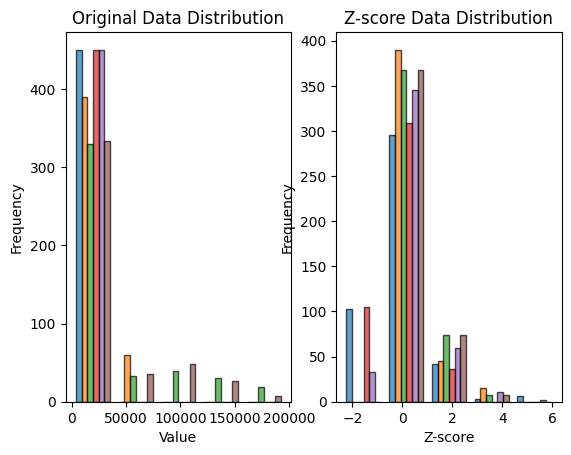

In [54]:
plt.subplot(1, 2, 1)
plt.hist(selection, bins=5, edgecolor='black', alpha=0.7)
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the Z-score data distribution
plt.subplot(1, 2, 2)
plt.hist(stats.zscore(selection), bins=5, edgecolor='black', alpha=0.7)
plt.title('Z-score Data Distribution')
plt.xlabel('Z-score')
plt.ylabel('Frequency')

## Conversion of Categorical Data into Dummy Variables

●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.
●	Steps:

Discuss the need for converting categorical data into dummy variables (one-hot encoding).

Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.

Display a portion of the transformed dataset.


In [55]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.5 MB/s eta 0:00:00


In [56]:
import category_encoders as ce

In [57]:
encoder=ce.OneHotEncoder(cols='Avg Price',handle_unknown='return_nan',return_df=True,use_cat_names=True)
selection_encoded=encoder.fit_transform(selection)
print(selection_encoded)

     Volume  Avg Price_12100.0  Avg Price_10100.0  Avg Price_16100.0  \
0        15                1.0                0.0                0.0   
1        10                0.0                1.0                0.0   
2         7                0.0                0.0                1.0   
3         6                0.0                0.0                0.0   
4         3                0.0                0.0                0.0   
..      ...                ...                ...                ...   
445       2                0.0                0.0                0.0   
446       6                0.0                0.0                0.0   
447       2                0.0                0.0                0.0   
448       3                0.0                0.0                0.0   
449       1                0.0                0.0                0.0   

     Avg Price_20100.0  Avg Price_8100.0  Avg Price_49100.0  \
0                  0.0               0.0                0.0   
1        

In [58]:
encoder=ce.OneHotEncoder(cols='Volume',handle_unknown='return_nan',return_df=True,use_cat_names=True)
selection_encoded=encoder.fit_transform(selection)
print(selection_encoded)

     Volume_15.0  Volume_10.0  Volume_7.0  Volume_6.0  Volume_3.0  Volume_2.0  \
0            1.0          0.0         0.0         0.0         0.0         0.0   
1            0.0          1.0         0.0         0.0         0.0         0.0   
2            0.0          0.0         1.0         0.0         0.0         0.0   
3            0.0          0.0         0.0         1.0         0.0         0.0   
4            0.0          0.0         0.0         0.0         1.0         0.0   
..           ...          ...         ...         ...         ...         ...   
445          0.0          0.0         0.0         0.0         0.0         1.0   
446          0.0          0.0         0.0         1.0         0.0         0.0   
447          0.0          0.0         0.0         0.0         0.0         1.0   
448          0.0          0.0         0.0         0.0         1.0         0.0   
449          0.0          0.0         0.0         0.0         0.0         0.0   

     Volume_13.0  Volume_4.

In [60]:
encoder=ce.OneHotEncoder(cols='Total Sales Value',handle_unknown='return_nan',return_df=True,use_cat_names=True)
selection_encoded=encoder.fit_transform(selection)
print(selection_encoded)

     Volume  Avg Price  Total Sales Value_181500.0  \
0        15      12100                         1.0   
1        10      10100                         0.0   
2         7      16100                         0.0   
3         6      20100                         0.0   
4         3       8100                         0.0   
..      ...        ...                         ...   
445       2       1300                         0.0   
446       6       2600                         0.0   
447       2       1600                         0.0   
448       3       1900                         0.0   
449       1       3100                         0.0   

     Total Sales Value_101000.0  Total Sales Value_112700.0  \
0                           0.0                         0.0   
1                           1.0                         0.0   
2                           0.0                         1.0   
3                           0.0                         0.0   
4                           0.0     

In [59]:
encoder=ce.OneHotEncoder(cols='Discount Rate (%)',handle_unknown='return_nan',return_df=True,use_cat_names=True)
selection_encoded=encoder.fit_transform(selection)
print(selection_encoded)

     Volume  Avg Price  Total Sales Value  \
0        15      12100             181500   
1        10      10100             101000   
2         7      16100             112700   
3         6      20100             120600   
4         3       8100              24300   
..      ...        ...                ...   
445       2       1300               2600   
446       6       2600              15600   
447       2       1600               3200   
448       3       1900               5700   
449       1       3100               3100   

     Discount Rate (%)_11.654820286277229  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
..                                    ...   
445                                   0.0   
446                                   0.0   
447                                   0.0   
448      

In [62]:
encoder=ce.OneHotEncoder(cols='Discount Amount',handle_unknown='return_nan',return_df=True,use_cat_names=True)
selection_encoded=encoder.fit_transform(selection)
print(selection_encoded)

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0        15      12100             181500          11.654820   
1        10      10100             101000          11.560498   
2         7      16100             112700           9.456886   
3         6      20100             120600           6.935385   
4         3       8100              24300          17.995663   
..      ...        ...                ...                ...   
445       2       1300               2600          15.475687   
446       6       2600              15600          17.057027   
447       2       1600               3200          18.965550   
448       3       1900               5700          16.793014   
449       1       3100               3100          15.333300   

     Discount Amount_21153.49881959317  Discount Amount_11676.102960983731  \
0                                  1.0                                 0.0   
1                                  0.0                                 1.0 

In [61]:
encoder=ce.OneHotEncoder(cols='Net Sales Value',handle_unknown='return_nan',return_df=True,use_cat_names=True)
selection_encoded=encoder.fit_transform(selection)
print(selection_encoded)

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value_160346